# Tax Return Disclosure – Data Analysis

## Imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import seaborn as sn
import matplotlib.pyplot as plt

Set Working Directory

In [2]:
os.getcwd()

'/Users/johannes/GitHub/Income_Tax_Return_Disclosure/1_code'

In [3]:
os.chdir('/Users/johannes/GitHub/Income_Tax_Return_Disclosure')

## Import Data

In [4]:
modelresults_df1 = pd.read_pickle(os.path.join('2_temp_files', 'modeldata_1.pkl'))
modelresults_df2 = pd.read_pickle(os.path.join('2_temp_files', 'modeldata_2.pkl'))
modelresults_df3 = pd.read_pickle(os.path.join('2_temp_files', 'modeldata_3.pkl'))
modelresults_df4 = pd.read_pickle(os.path.join('2_temp_files', 'modeldata_4.pkl'))
modelresults_df5 = pd.read_pickle(os.path.join('2_temp_files', 'modeldata_5.pkl'))
modelresults_df6 = pd.read_pickle(os.path.join('2_temp_files', 'modeldata_6.pkl'))
modelresults_df7 = pd.read_pickle(os.path.join('2_temp_files', 'modeldata_7.pkl'))
modelresults_df8 = pd.read_pickle(os.path.join('2_temp_files', 'modeldata_8.pkl'))
modelresults_df9 = pd.read_pickle(os.path.join('2_temp_files', 'modeldata_9.pkl'))
modelresults_df10 = pd.read_pickle(os.path.join('2_temp_files', 'modeldata_10.pkl'))

In [5]:
modelresults_df = modelresults_df1.append(modelresults_df2, ignore_index = True)
modelresults_df = modelresults_df.append(modelresults_df3, ignore_index = True)
modelresults_df = modelresults_df.append(modelresults_df4, ignore_index = True)
modelresults_df = modelresults_df.append(modelresults_df5, ignore_index = True)
modelresults_df = modelresults_df.append(modelresults_df6, ignore_index = True)
modelresults_df = modelresults_df.append(modelresults_df7, ignore_index = True)
modelresults_df = modelresults_df.append(modelresults_df8, ignore_index = True)
modelresults_df = modelresults_df.append(modelresults_df9, ignore_index = True)
modelresults_df = modelresults_df.append(modelresults_df10, ignore_index = True)

In [6]:
modelresults_df

,scen,kappa,complexity,rho_upper,Run,Number of Avoiders,Number of Evaders,Number of Honest,Tax,N,blockingfour,neighbors,intr_honest,audit_discl
0,1,0.01,1.167,0.05,1000,0.381,0.376,0.243,0.140164,1000,1,20,0.0,0
1,3,0.01,1.167,0.05,1000,0.990,0.010,0.000,0.108127,1000,1,20,0.0,0
2,3,0.01,1.167,0.05,1000,0.991,0.008,0.001,0.104112,1000,1,20,0.0,0
3,3,0.01,1.167,0.05,1000,0.992,0.007,0.001,0.099482,1000,1,20,0.0,0
4,3,0.01,1.167,0.05,1000,0.992,0.008,0.000,0.095009,1000,1,20,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,1,0.45,3.500,0.10,1000,0.256,0.249,0.495,0.339311,1000,1,20,0.2,1
11996,1,0.45,3.500,0.10,1000,0.236,0.239,0.525,0.339340,1000,1,20,0.2,1
11997,1,0.45,3.500,0.10,1000,0.243,0.255,0.502,0.338567,1000,1,20,0.2,1
11998,1,0.45,3.500,0.10,1000,0.282,0.234,0.484,0.339675,1000,1,20,0.2,1


Add binary variables for State and Setting; add interactions

In [7]:
#agentresults_df['Optimizer'] = np.where(agentresults_df['State'] == 2, 1, 0)
#agentresults_df['Evader'] = np.where(agentresults_df['State'] == 3, 1, 0)
#agentresults_df['Honest'] = np.where(agentresults_df['State'] < 2, 1, 0)
#agentresults_df['Partial Disclosure'] = np.where(agentresults_df['scen'] == 2, 1, 0)
#agentresults_df['Full Disclosure'] = np.where(agentresults_df['scen'] == 3, 1, 0)
#agentresults_df['Partial x Neighbors'] = agentresults_df['Partial Disclosure'] * agentresults_df['Number Neighbors']
#agentresults_df['Full x Neighbors'] = agentresults_df['Full Disclosure'] * agentresults_df['Number Neighbors']
#agentresults_df['Partial x AuditPubl'] = agentresults_df['Partial Disclosure'] * agentresults_df['audit_discl']
#agentresults_df['Full x AuditPubl'] = agentresults_df['Full Disclosure'] * agentresults_df['audit_discl']

modelresults_df['Partial Disclosure'] = np.where(modelresults_df['scen'] == 2, 1, 0)
modelresults_df['Full Disclosure'] = np.where(modelresults_df['scen'] == 3, 1, 0)
modelresults_df['Partial x Complexity'] = modelresults_df['Partial Disclosure'] * modelresults_df['complexity']
modelresults_df['Full x Complexity'] = modelresults_df['Full Disclosure'] * modelresults_df['complexity']
modelresults_df['Partial x Intr'] = modelresults_df['Partial Disclosure'] * modelresults_df['intr_honest']
modelresults_df['Full x Intr'] = modelresults_df['Full Disclosure'] * modelresults_df['intr_honest']
modelresults_df['Partial x Audit_Discl'] = modelresults_df['Partial Disclosure'] * modelresults_df['audit_discl']
modelresults_df['Full x Audit_Discl'] = modelresults_df['Full Disclosure'] * modelresults_df['audit_discl']
modelresults_df['Partial x Kappa'] = modelresults_df['Partial Disclosure'] * modelresults_df['kappa']
modelresults_df['Full x Kappa'] = modelresults_df['Full Disclosure'] * modelresults_df['kappa']
#modelresults_df['High avoider'] = np.where(modelresults_df['initial_avoider'] == 0.55, 1, 0)
#modelresults_df['Partial x High Avoider'] = modelresults_df['Partial Disclosure'] * modelresults_df['High avoider']
#modelresults_df['Full x High Avoider'] = modelresults_df['Full Disclosure'] * modelresults_df['High avoider']
#modelresults_df['Low avoider'] = np.where(modelresults_df['initial_avoider'] == 0.35, 1, 0)
#modelresults_df['Partial x Low Avoider'] = modelresults_df['Partial Disclosure'] * modelresults_df['Low avoider']
#modelresults_df['Full x Low Avoider'] = modelresults_df['Full Disclosure'] * modelresults_df['Low avoider']
#modelresults_df['Partial x Initial_Avoider'] = modelresults_df['Partial Disclosure'] * modelresults_df['initial_avoider']
#modelresults_df['Full x Initial_Avoider'] = modelresults_df['Full Disclosure'] * modelresults_df['initial_avoider']
modelresults_df['Partial x Rho'] = modelresults_df['Partial Disclosure'] * modelresults_df['rho_upper']
modelresults_df['Full x Rho'] = modelresults_df['Full Disclosure'] * modelresults_df['rho_upper']

In [8]:
modelresults_df

,scen,kappa,complexity,rho_upper,Run,Number of Avoiders,Number of Evaders,Number of Honest,Tax,N,...,Partial x Complexity,Full x Complexity,Partial x Intr,Full x Intr,Partial x Audit_Discl,Full x Audit_Discl,Partial x Kappa,Full x Kappa,Partial x Rho,Full x Rho
0,1,0.01,1.167,0.05,1000,0.381,0.376,0.243,0.140164,1000,...,0.0,0.000,0.0,0.0,0,0,0.0,0.00,0.0,0.00
1,3,0.01,1.167,0.05,1000,0.990,0.010,0.000,0.108127,1000,...,0.0,1.167,0.0,0.0,0,0,0.0,0.01,0.0,0.05
2,3,0.01,1.167,0.05,1000,0.991,0.008,0.001,0.104112,1000,...,0.0,1.167,0.0,0.0,0,0,0.0,0.01,0.0,0.05
3,3,0.01,1.167,0.05,1000,0.992,0.007,0.001,0.099482,1000,...,0.0,1.167,0.0,0.0,0,0,0.0,0.01,0.0,0.05
4,3,0.01,1.167,0.05,1000,0.992,0.008,0.000,0.095009,1000,...,0.0,1.167,0.0,0.0,0,0,0.0,0.01,0.0,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,1,0.45,3.500,0.10,1000,0.256,0.249,0.495,0.339311,1000,...,0.0,0.000,0.0,0.0,0,0,0.0,0.00,0.0,0.00
11996,1,0.45,3.500,0.10,1000,0.236,0.239,0.525,0.339340,1000,...,0.0,0.000,0.0,0.0,0,0,0.0,0.00,0.0,0.00
11997,1,0.45,3.500,0.10,1000,0.243,0.255,0.502,0.338567,1000,...,0.0,0.000,0.0,0.0,0,0,0.0,0.00,0.0,0.00
11998,1,0.45,3.500,0.10,1000,0.282,0.234,0.484,0.339675,1000,...,0.0,0.000,0.0,0.0,0,0,0.0,0.00,0.0,0.00


## Regressions of aggregated (Model-) Data

### Dependent: Number of Avoiders

In [22]:
y = modelresults_df[['Number of Avoiders']]
X = modelresults_df[['intr_honest', 
                     'audit_discl', 
                     'complexity', 
                     'kappa', 
                     'Partial Disclosure', 
                     'Full Disclosure', 
                     'Partial x Intr', 
                     'Full x Intr', 
                     'Partial x Audit_Discl', 
                     'Full x Audit_Discl', 
                     'Partial x Complexity', 
                     'Full x Complexity', 
                     'Partial x Kappa', 
                     'Full x Kappa',
                     'rho_upper',
                     'Partial x Rho',
                     'Full x Rho'
                    ]]
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:     Number of Avoiders   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     2361.
Date:                Mon, 07 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:15:20   Log-Likelihood:                 5550.0
No. Observations:               12000   AIC:                        -1.106e+04
Df Residuals:                   11982   BIC:                        -1.093e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.42

### Dependent: Number of Evaders

In [23]:
y = modelresults_df[['Number of Evaders']]
X = modelresults_df[['intr_honest', 
                     'audit_discl', 
                     'complexity', 
                     'kappa', 
                     'Partial Disclosure', 
                     'Full Disclosure', 
                     'Partial x Intr', 
                     'Full x Intr', 
                     'Partial x Audit_Discl', 
                     'Full x Audit_Discl', 
                     'Partial x Complexity', 
                     'Full x Complexity', 
                     'Partial x Kappa', 
                     'Full x Kappa',
                     'rho_upper',
                     'Partial x Rho',
                     'Full x Rho'
                    ]]
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:      Number of Evaders   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     923.5
Date:                Mon, 07 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:15:25   Log-Likelihood:                 6850.8
No. Observations:               12000   AIC:                        -1.367e+04
Df Residuals:                   11982   BIC:                        -1.353e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.37

### Dependent: Number of Honest

In [24]:
y = modelresults_df[['Number of Honest']]
X = modelresults_df[['intr_honest', 
                     'audit_discl', 
                     'complexity', 
                     'kappa', 
                     'Partial Disclosure', 
                     'Full Disclosure', 
                     'Partial x Intr', 
                     'Full x Intr', 
                     'Partial x Audit_Discl', 
                     'Full x Audit_Discl', 
                     'Partial x Complexity', 
                     'Full x Complexity', 
                     'Partial x Kappa', 
                     'Full x Kappa',
                     'rho_upper',
                     'Partial x Rho',
                     'Full x Rho'
                    ]]
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:       Number of Honest   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     1784.
Date:                Mon, 07 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:15:30   Log-Likelihood:                 2589.8
No. Observations:               12000   AIC:                            -5144.
Df Residuals:                   11982   BIC:                            -5010.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.19

### Dependent: Effective Tax Rate

In [25]:
y = modelresults_df[['Tax']]
X = modelresults_df[['intr_honest', 
                     'audit_discl', 
                     'complexity', 
                     'kappa', 
                     'Partial Disclosure', 
                     'Full Disclosure', 
                     'Partial x Intr', 
                     'Full x Intr', 
                     'Partial x Audit_Discl', 
                     'Full x Audit_Discl', 
                     'Partial x Complexity', 
                     'Full x Complexity', 
                     'Partial x Kappa', 
                     'Full x Kappa',
                     'rho_upper',
                     'Partial x Rho',
                     'Full x Rho'
                    ]]
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    Tax   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     2120.
Date:                Mon, 07 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:15:35   Log-Likelihood:                 23145.
No. Observations:               12000   AIC:                        -4.625e+04
Df Residuals:                   11982   BIC:                        -4.612e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.12

## Show correlation matrix

In [19]:
corrMatrix = modelresults_df.corr()
corrMatrix

,scen,kappa,complexity,rho_upper,Run,Number of Avoiders,Number of Evaders,Number of Honest,Tax,N,...,Partial x Complexity,Full x Complexity,Partial x Intr,Full x Intr,Partial x Audit_Discl,Full x Audit_Discl,Partial x Kappa,Full x Kappa,Partial x Rho,Full x Rho
scen,1.000000e+00,-6.597113e-17,6.105363e-17,-3.026838e-16,NaN,0.165143,-0.338152,0.048549,-0.013394,NaN,...,-1.145057e-16,7.886111e-01,-7.319674e-16,6.546537e-01,-5.655200e-16,5.477226e-01,4.326190e-17,6.485567e-01,1.917736e-16,8.017837e-01
kappa,-6.597113e-17,1.000000e+00,-4.623720e-17,-2.283431e-16,NaN,0.013222,0.113194,-0.075664,-0.038046,NaN,...,3.338799e-18,-8.702732e-17,6.818183e-16,6.715162e-16,1.649264e-15,1.482848e-15,3.826076e-01,3.826076e-01,-2.072672e-18,1.040942e-17
complexity,6.105363e-17,-4.623720e-17,1.000000e+00,-4.708992e-17,NaN,-0.473260,0.196119,0.299236,0.516484,NaN,...,2.386001e-01,2.386001e-01,-3.766205e-16,-5.432026e-17,-5.363489e-16,-1.925931e-16,-2.322148e-16,2.988470e-16,-2.774483e-16,1.482061e-16
rho_upper,-3.026838e-16,-2.283431e-16,-4.708992e-17,1.000000e+00,NaN,0.007876,-0.040174,0.015954,0.025378,NaN,...,-6.766343e-17,-2.247132e-16,8.117483e-16,5.075759e-16,2.766815e-15,3.122097e-15,-3.026325e-16,-1.080531e-16,2.182179e-01,2.182179e-01
Run,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number of Avoiders,1.651431e-01,1.322229e-02,-4.732597e-01,7.876022e-03,NaN,1.000000,-0.075091,-0.824722,-0.772561,NaN,...,-4.107864e-01,4.157322e-02,-4.691594e-01,1.781586e-01,-2.417136e-01,2.584103e-01,-3.027122e-01,2.665294e-01,-3.934677e-01,3.342791e-01
Number of Evaders,-3.381517e-01,1.131936e-01,1.961186e-01,-4.017427e-02,NaN,-0.075091,1.000000,-0.502013,-0.256243,NaN,...,-3.072532e-01,1.012887e-02,-4.078395e-01,-3.254114e-01,-2.209843e-01,-1.218787e-01,-2.212288e-01,7.989628e-03,-3.007945e-01,-1.303088e-01
Number of Honest,4.854937e-02,-7.566446e-02,2.992356e-01,1.595350e-02,NaN,-0.824722,-0.502013,1.000000,0.815375,NaN,...,5.305343e-01,-4.180131e-02,6.382083e-01,3.003530e-02,3.349694e-01,-1.549993e-01,3.880127e-01,-2.356946e-01,5.118507e-01,-2.160199e-01
Tax,-1.339351e-02,-3.804573e-02,5.164835e-01,2.537787e-02,NaN,-0.772561,-0.256243,0.815375,1.000000,NaN,...,4.416175e-01,2.038008e-02,4.881131e-01,-6.547247e-02,3.112691e-01,-1.065536e-01,3.129765e-01,-1.988619e-01,4.078036e-01,-2.133157e-01
N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Show heat map of correlation matrix

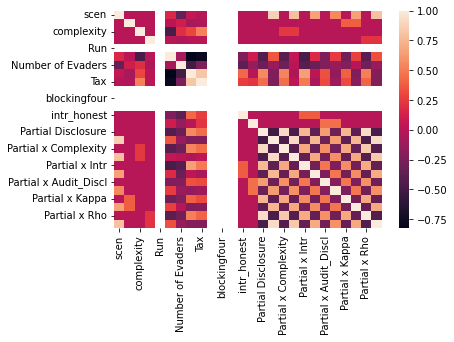

In [20]:
sn.heatmap(corrMatrix, annot=False)
plt.show()

## Save correlation matrix

In [21]:
corrMatrix.to_excel(os.path.join('2_temp_files', 'correlationmatrix.xlsx'), index = True)